In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import nrrd

In [6]:
image, _ = nrrd.read("/cluster/work/felixzr/TDT4265_StarterCode_2024/data/ASOCA/Normal/CTCA/Normal_17.nrrd")

truth_path = "/cluster/work/felixzr/TDT4265_StarterCode_2024/data_flat/Annotation_Normal_17.nrrd"
nrrd_data, nrrd_header = nrrd.read(truth_path)
lbl = np.array(nrrd_data)

prediction_path = "/cluster/work/felixzr/TDT4265_StarterCode_2024/project/model1_auto3dseg/segresnet_0/prediction_testing/CTCA_Normal_17.nii.gz"
prediction_nib = nib.load(prediction_path)
pred = np.array(prediction_nib.dataobj)

99

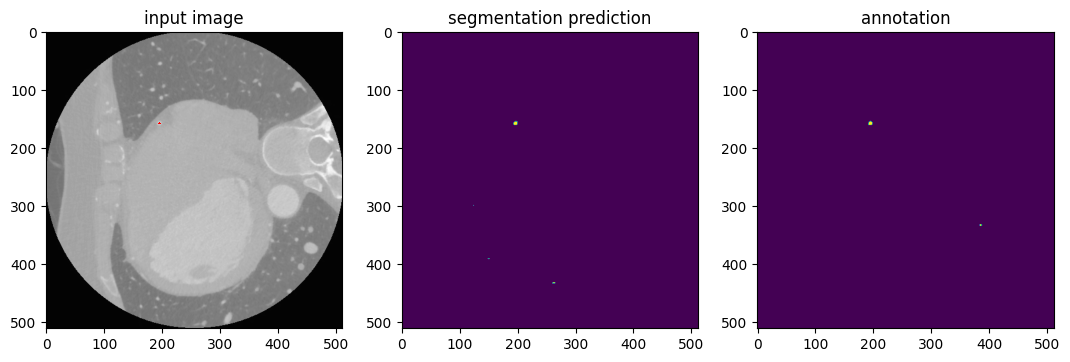

In [31]:
i = np.random.randint(image.shape[2]-1)

fig, axs = plt.subplots(1, 3, figsize=(13, 4))

axs[0].set_title("input image")
axs[0].imshow(image[:, :, i], cmap="gray")
arr = lbl[:,:,i].astype(float)
arr[arr == 0] = np.nan
axs[0].imshow(arr, cmap="bwr_r")

axs[1].set_title("segmentation prediction")
axs[1].imshow(pred[:,:,i], cmap="viridis")

axs[2].set_title("annotation")
axs[2].imshow(lbl[:,:,i], cmap="viridis")

i